# Unidad 3. Problema 1

En el archivo auto.csv se encuentran los siguientes datos de diferentes automóviles:

* **cylinders**: Cilindros
* **displacement**: Cilindrada
* **horsepower**: Potencia
* **weight**: Peso
* **acceleration**: Aceleración
* **model_year**: Año del coche
* **origin**: Origen
* **mpg**: Consumo (millas por galones de gasolina)

Las unidades de las características de los automóviles no se encuentran en el sistema internacional. La variable “origen” es un código que identifica al país de origen.

Crea un modelo con él para que se pueda estimar el consumo de un vehículo a partir del resto de las variables.

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Carga y Vista Preliminar de Datos

In [162]:
autos = pd.read_csv('auto.csv')

In [163]:
autos.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0


In [269]:
np.round(autos.describe(),2)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,5.47,194.41,104.47,2977.58,15.54,75.98,1.58,23.45
std,1.71,104.64,38.49,849.40,2.76,3.68,0.81,7.81
min,3.00,68.00,46.00,1613.00,8.00,70.00,1.00,9.00
25%,4.00,105.00,75.00,2225.25,13.78,73.00,1.00,17.00
50%,4.00,151.00,93.50,2803.50,15.50,76.00,1.00,22.75
75%,8.00,275.75,126.00,3614.75,17.02,79.00,2.00,29.00
max,8.00,455.00,230.00,5140.00,24.80,82.00,3.00,46.60


Si vemos como los coches se reparten segun su origen podemos ver que el origen '1' tiene muchos mas coches que las otras dos categorias.

In [270]:
autos.groupby(autos.origin).count()

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
origin,,,,,,,
1,245,245,245,245,245,245,245
2,68,68,68,68,68,68,68
3,79,79,79,79,79,79,79


In [13]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    float64
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 24.6 KB


No hay valores nulos, no hay necesidad de imputar valores

## Ingenieria de Caracteristicas

Primero, vamos a convertir la categoria origen en una variable categorica, para ello usaremos una lambda para convertir los diferentes valores numericos en cadenas.

In [164]:
autos.origin = autos.origin.apply(lambda x: str(x))

En el mundo del motor se usan el ratio potencia/peso y potencia/cubicaje, podemos calcular ambas variables a partir de variables que ya tenemos: *weight* y *horsepower* 

In [165]:
autos['power_weight_ratio'] = (autos['horsepower']/autos['weight'])
autos['power_displacement_ratio'] = (autos['horsepower']/autos['displacement'])

## Analisis Exploratorio de Datos

### Distribucion de la Variable Objetivo (mpg)

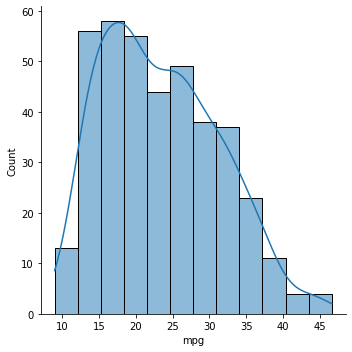

In [184]:
sns.displot(x = 'mpg', data = autos, kde = True)

No encontramos valores extremos en la variable objetivo que debamos eliminar.

### Relacion de Variables Numericas

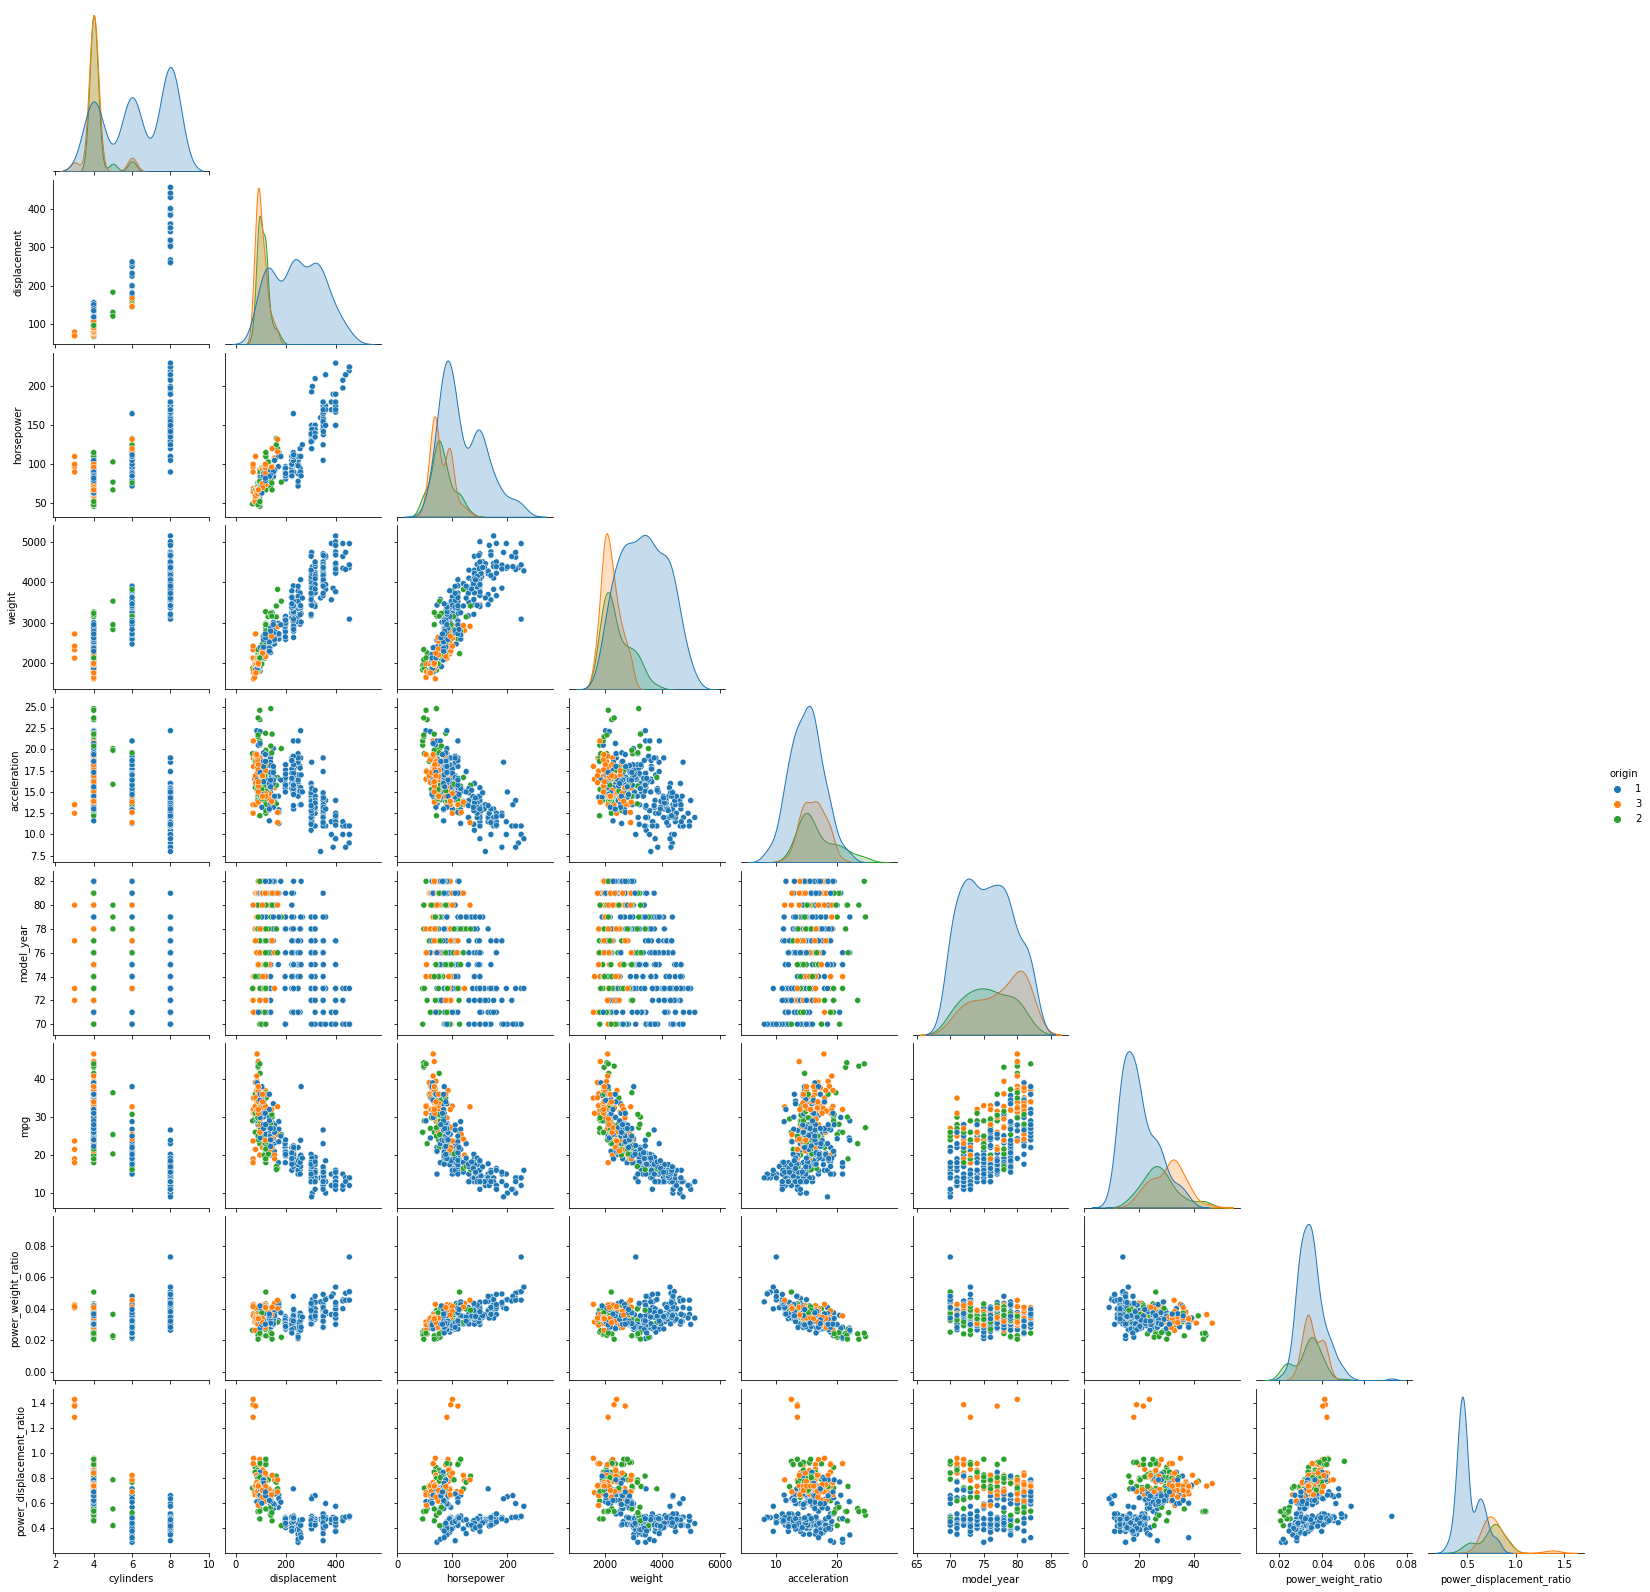

In [150]:
sns.pairplot(autos, hue="origin", corner = True)

Podemos ver que la variable objetivo (*miles per gallon*) disminuye a medida que las variables cilindros, cubicaje, potencia, peso aumentan, mientras que la variable objetivo aumenta a medida que el ano de produccion del modelo lo hace (es decir, este sea mas reciente). Del grafico no es posible deducir una correlacion clara entre aceleracion y el consumo del coche.

### Relacion de la Variable Categorica 'origin' con la Variable Objetivo 'mpg'

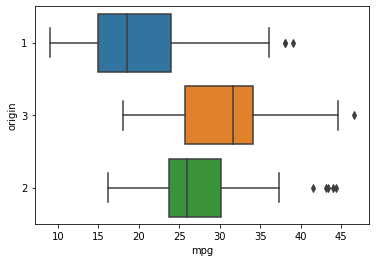

In [32]:
sns.boxplot(x = 'mpg', y = 'origin', data = autos)

Podemos ver que la categoria 1 es mucho mas ineficiente cuando se trata del consumo, ya que es capaz de recorrer menos millas por galon de gasolina. Mientras que las otras dos categorias (origen 2 y 3) son mas eficientes. 

### Matrix de Correlacion

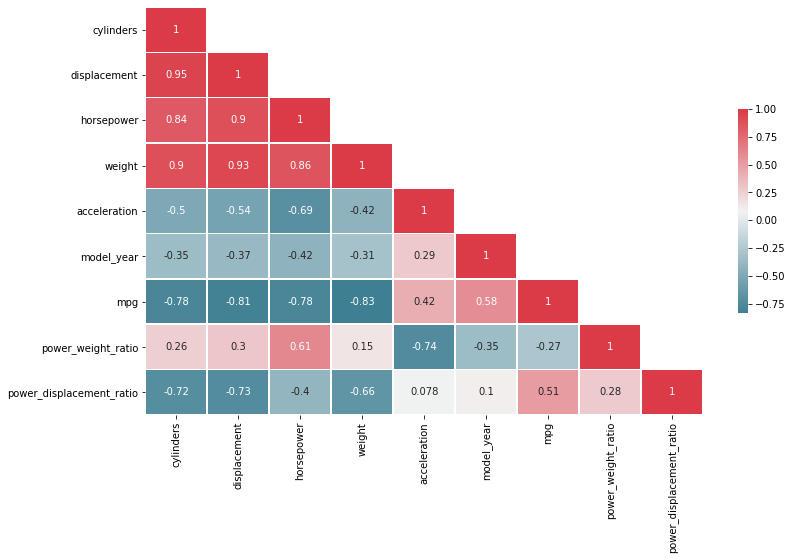

In [136]:
# Creacion de la matrix de correlacion
corr_autos = autos.corr() 

# Mascara triangular 
mascara = corr_autos.where(np.tril(np.ones(corr_autos.shape)).astype(np.bool))

plt.figure(figsize=(12.5,7.5)) 

# Genera un colormap customizado
cmap = sns.diverging_palette(220, 10, as_cmap=True)

corrmap=sns.heatmap(mascara, annot = True, cmap = cmap, linewidths=.5, cbar_kws={"shrink": .5})  

Vemos que la variable objetivo tiene mayor correlacion negativa con el numero de cilindros, la cilindrada, la potencia y el peso (todos en un rango entre -0.78 y -0.83), y tiene una mayor correlacion positiva con la variable ano del modelo, ratio potencia/cubicaje y aceleracion. La variable ratio potencia/peso es la que menos correlacion tiene con la variable objetivo (-0.27).

La variable peso, es la que mas correlacion tiene con la variable objetivo, esta variable tiene indices de correlacion de mas del 0.86 con las variables numero de cilindros, cilindrada y potencia, por lo que tendriamos colinearidad, esto habra que tenerlo en cuenta mas adelante cuando seleccionemos que caracteristicas debemos elegir para nuestro modelo.

## Preprocesamiento de Datos

### Obtencion de Variables Dummies

Primero tendremos que convertir la variable categorica *origin* en tres variables binarias *dummies*, una por cada origen. Asi nuestros diferentes modelos de aprendizaje podran usar esa informacion.

In [166]:
# Obtenemos las variables dummies con pandas
origin = pd.get_dummies(autos['origin'], drop_first = False)

### Division del Dataset entre Matriz de Caracteristicas y Vector Objetivo

Para ello crearemos una matriz $X$ desechando la variable objetivo y la variable *origin* (esta ultima porque la acabamos de hacer dummy), con la variable objetivo crearemos el vector objetivo $y$.

In [167]:
to_drop = ['mpg', 'origin'] # Variables a desechar
y = autos.mpg
X = autos.drop(to_drop, axis = 1)

### Estandarizacion de las Variables Numericas Continuas

Las variables numericas utilizan diferentes escalas y para un mejor procesamiento de los datos seria necesario estandarizar todas ellas, para ello usaremos la funcion *StandardScaler* de la liberira *Scikit Learn*. Esta funcion. Esta funcion estandariza los valores restandole su media y luego dividiendo ese resultado por la desviacion estandar.

In [168]:
variables = X.columns # Guardamos los nombres de las columnas en 'variables'

In [169]:
from sklearn.preprocessing import StandardScaler #Procedemos a estandarizar los datos.

scaler_X = StandardScaler()
scaler_X = scaler_X.fit(X)
X = pd.DataFrame(scaler_X.transform(X)) # Convertimos el resultado en un dataset de nuevo
X.columns = variables 

Tras estandarizar las variables numericas anadimos las variables dummies a nuestro dataset X

In [170]:
X = pd.concat([X, origin], axis = 1)

In [171]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,power_weight_ratio,power_displacement_ratio,1,2,3
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,0.382496,-1.026037,1,0,0
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,1.661177,-0.758598,1,0,0
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,1.488456,-0.757095,1,0,0
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,1.494892,-0.636001,1,0,0
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,0.971505,-0.802371,1,0,0


Ahora, realizaremos una copia tanto de la matriz de caracteristicas $X$ como del vector objetivo $y$ para luego usarlos en el modelo conexionista que usaremos mas adelante. 

Hacemos la copia en este momento pues los modelos conexionistas no necesitan un preprocesamiento de seleccion de caracteristicas y esto es lo siguiente que haremos.

In [172]:
# Copia para el modelo conexionista

X_ann = X.copy()
y_ann = y.copy()

### Seleccion de Caracteristicas

Ahora seleccionaremos las caracteristicas necesarias para nuestros modelos de aprendizaje automatico.

Para la seleccion de caracteristicas usaremos la funcion *RFE* de la libreria *Scikit Learn*, ademas de usar Regresion Lineal como base para ver con que caracteristicas nos quedamos. 

Contamos con 11 variables y queremos usar el minimo posible de caracteristicas por lo que fijaremos el parametro *n_features_to_select* en 6, numero resulante de dividir el numero de variables entre 2 y redondear hacia el numero superior. 

Mas adelante calcularemos el $R^{2} \ ajustado$ para comprobar si este numero minimo de caracteristicas ha sido el adecuado.

In [173]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 6, step = 1)
selector = selector.fit(X, y)
selector.support_

array([False,  True,  True,  True, False,  True,  True, False,  True,
       False, False])

La funcion *RFE* nos devuelve una lista de booleanos que podemos usar como mascara para seleccionar con que caracteristicas nos quedamos finalmente.

In [174]:
X =  X.loc[:, selector.support_] # Aplicacion de la mascara.

In [175]:
X.head()

,displacement,horsepower,weight,model_year,power_weight_ratio,1
0,1.077290,0.664133,0.620540,-1.625315,0.382496,1
1,1.488732,1.574594,0.843334,-1.625315,1.661177,1
2,1.182542,1.184397,0.540382,-1.625315,1.488456,1
3,1.048584,1.184397,0.536845,-1.625315,1.494892,1
4,1.029447,0.924265,0.555706,-1.625315,0.971505,1


Es interesante notar que de las variables dummies solo se ha quedado con la categoria '1', asi que respecto a origen contamos con los valores del modelo siendo perteneciente al origen 1 (1) o no (0).

Una vez tenemos las caracteristicas seleccionadas vamos a ver si existe colinearidad entre estas:

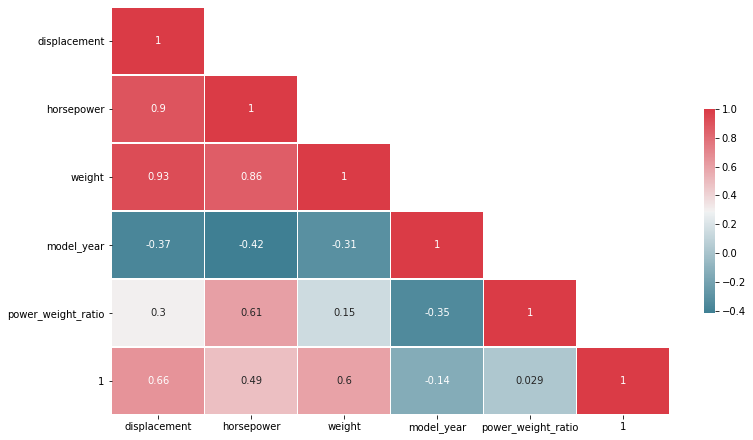

In [287]:
corr_X = X.corr() 
mascara = corr_X.where(np.tril(np.ones(corr_X.shape)).astype(np.bool))

plt.figure(figsize=(12.5,7.5)) 

cmap = sns.diverging_palette(220, 10, as_cmap=True)

corrmap=sns.heatmap(mascara, annot = True, cmap = cmap, linewidths=.5, cbar_kws={"shrink": .5})  

Tenemos colinearidad entre el peso, cilindrada y potencia. De entre estas tres, como pudimos comprobar anteriormente, la variable peso es la que tiene mayor indice de correlacion con la variable objetivo, asi que quitaremos del modelo tanto la variable cilindrada, como la variable potencia.

In [176]:
X = X.drop(['displacement', 'horsepower'], axis = 1)

### Division del Dataset entre Set de Entrenamiento y Set de Testeo

Ahora nos disponemos a dividir los datos entre set de entrenamiento y de testeo. 

El set de entrenamiento tendra 2/3 de las entradas del dataset X y del vector objetivo $y$, el 1/3 restante sera para testeo.

In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Modelo de Aprendizaje Automatico

A continuacion probaremos diferentes modelos de aprendizaje automatico para ver cuales tienen mayor capacidad de prediccion. 

Para el presente ejercicio se han utilizado algoritmos de aprendizaje que suelen funcionar mejor para problemas de regresion lineal: *Linear Regression, Random Forest, Gradient Boosting Regressor, XGBoost Regressor* y *LightGBM Regressor*.

### Regresion Linear

Empezaremos con un modelo de regresion lineal, pues se trata de un problema de regresion lineal.

In [178]:
model_reg = LinearRegression()
model_reg.fit(X_train, y_train) # Ajustamos el modelo a nuestros datos

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicciones y Puntuaciones del Modelo de Regresion Lineal

In [179]:
y_pred = model_reg.predict(X_test) # Predicciones del modelo sobre set de testeo

Para ver que resultado obtenemos importaremos de la libreria *Scikit Learn* las metricas $R^{2}$ y el error cuadratico medio.

Calcularemos el $R^{2}$ ajustados utilizando la siguiente formula:

$R^{2} \ ajustado = 1 - [\frac{(1-R^{2})(n - 1)}{n-k-1}]$

In [183]:
from sklearn.metrics import r2_score, mean_squared_error

print('Coeficientes:', np.round(model_reg.coef_, 3))
print('Interseccion:', np.round(model_reg.intercept_, 3))
print('Error cuadratico medio:', np.round(mean_squared_error(y_test, y_pred), 3))
r2 = r2_score(y_test, y_pred)
print('R^2:', np.round(r2,3))
n = len(autos)
k = len(X_train.columns)
r2adjusted = 1-((1-r2_score(y_test, y_pred))*(n-1)/(n-k-1))
print('R^2 ajustado:', np.round(r2adjusted,3))

Coeficientes: [-5.01   2.612 -0.662 -2.843]
Interseccion: 25.472
Error cuadratico medio: 11.242
R^2: 0.787
R^2 ajustado: 0.785


Por los coeficientes podemos ver que las variables mas importantes para el modelo es la variable peso (-5.01) y la variable origen 1 (-2.843). Seguidas por el ano de la creacion del modelo (2.612) y por ultimo el ratio potencia/peso (-0.662).

El $R^{2}$ es del 0.787, lo cual significa que nuestro modelo explica el 78.5% de la varianza. 

El $R^{2}$ ajustado nos da un 0.785, que es solo 0.002 inferior al $R^{2}$ no ajustado, esta diferencia minima es debida a que estamos manejando un numero pequeno de variables independientes (4 en total). Por lo que a partir de ahora usaremos el $R^{2}$ para calcular la varianza explicada por nuestros modelos.

El *Error Cuadratico Medio* nos da 11.242, intentaremos reducir este valor en los proximos modelos.

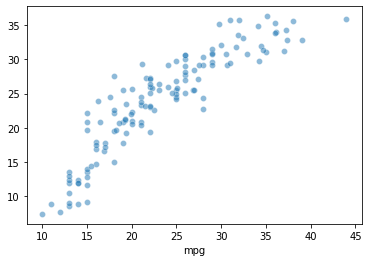

In [186]:
# Representacion grafica del vector y objetivo con las predicciones

sns.scatterplot(x = y_test, y = y_pred, alpha = 0.5)

Si representamos graficamente los resultados del set de testeo y los resultados dadas por nuestras predicciones hechas sobre el set de testeo, podemos ver como de preciso ha sido nuestro modelo. Si el error cuadratico medio fuera de 0, es decir, un ajuste perfecto sobre el set de testeo, tendriamos todos los puntos sobre una linea perfecta con pendiente 1 y con interseccion en el punto de origen.

Como vemos en la representacion grafica, nuestro modelo no se ajusta a una linea recta de pendiente 1, sino que parece dibujar un arco y esta escorado hacia arriba.

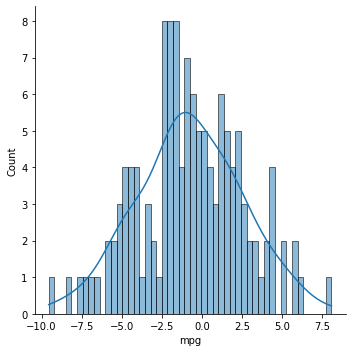

In [187]:
# Histograma con la distribucion de los residuos:

sns.displot((y_test - y_pred), bins=50, kde = True, alpha = 0.5)

Los residuos se distribuyen mas o menos alrededor del 0 y sigue una distribucion normal aproximadamente

### Random Forest Regressor

El random forest puede aplicarse a problemas de regresion tambien, empezaremos con un random forest activando el parametro *out of the bag* para usar muestras 'fuera de la bolsa' para estimar el $R^{2}$ de datos no usados en el muestreo aleatorio del random forest, esto nos ha dado resultados y por eso lo usaremos.

In [188]:
 from sklearn.ensemble import RandomForestRegressor 

rfc = RandomForestRegressor(oob_score = True, random_state = 1) 
rfc.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)

#### Optimizacion de los Parametros del Modelo Random Forest Regressor

Utilizaremos el *RandomizedSearchCV* de la libreria *Scikit Learn* para encontrar valores optimos, y nos apoyaremos en un diccionario *param_grid* con los valores que queremos que nuestro buscador de parametros optimos utilice.

En este caso no usaremos el *GridSearchCV* porque al tratarse de un random forest nos llevaria mucho tiempo probar todas las combinaciones posibles usando ademas validaciones cruzadas.

In [195]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'min_samples_leaf' : [1, 4, 6, 8, 10], 
              'min_samples_split' : [2, 4, 6, 8, 10, 12, 16], 
              'n_estimators': [200, 500, 800],
              'max_depth': [ 20, 30, 40, 50, None]}

RS = RandomizedSearchCV(estimator = rfc, 
                        param_distributions = param_grid, 
                        n_iter = 100, verbose = 2, 
                        random_state = 42, n_jobs = -1)
RS.fit(X_train, y_train) 
RS.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.4min finished


{'n_estimators': 800,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_depth': 30}

In [306]:
RS.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)

In [318]:
rfc = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)

#### Predicciones y Puntuaciones del Modelo Random Forest

In [319]:
y_rfcpred = rfc.predict(X_test)

In [348]:
print('Score:', np.round(rfc.score(X_test,y_test),2))
print('Error cuadratico medio:', np.round(mean_squared_error(y_test, y_rfcpred), 3))

Score: 0.85
Error cuadratico medio: 7.675


La *score* corresponde con el valor $R^{2}$, por lo que este modelo ha mejorado el modelo anterior de regresion lineal, se ha pasado de un 78.7% de varianza explicada por el modelo, a un 85%. 

El **Error cuadratico medio** tambien ha sido mejorado. Se ha pasado de un 11.24 a un 7.67.

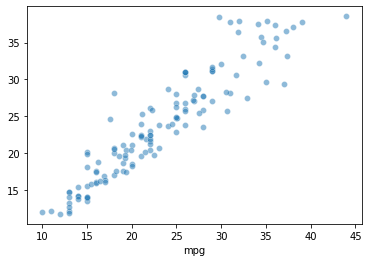

In [312]:
sns.scatterplot(x = y_test, y = y_rfcpred, alpha = 0.5)

Como podemos ver en la grafica, los valores estan distribuidos de una forma mas parecida a lo que seria el ajuste ideal (recta de pendiente 1 con la intereseccion en el punto de origen)

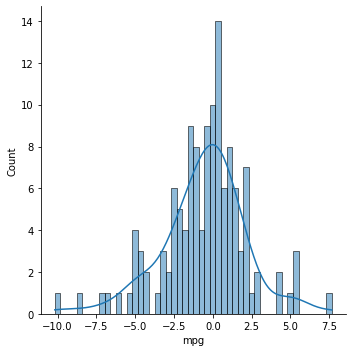

In [313]:
sns.displot((y_test - y_pred), bins=50, kde = True, alpha = 0.5)

Podemos ver como los residuos son menores y se concentran mas en torno al centro (punto 0.0)

### Gradient Boosting Regressor

Vamos a probar el Gradient Boosting Regressor, el Gradient Boosting es una técnica de aprendizaje automático utilizado para el análisis de la regresión (en este caso, aunque tambien puede usarse para clasificacion) el cual produce un modelo predictivo en forma de un conjunto de modelos de predicción débiles (arboles de decision en este caso), que luego ensambla. El Gradient Boosting construye modelos de forma escalonada y los generaliza permitiendo la optimización arbitraria de una función de pérdida diferenciable.

A la hora de crear el modelo, especificaremos que si el modelo no mejora por al menos 0.01 (*tol = 0.01*) en las ultimas diez iteraciones (*n_iter_no_change = 10*), este deje de ajustar escalones adicionales.

In [189]:
from sklearn.ensemble import GradientBoostingRegressor

score_gbes = [] 
n_estimators = 500

gbes = GradientBoostingRegressor(n_estimators=n_estimators, 
                                           validation_fraction=0.2, 
                                           n_iter_no_change= 10, tol=0.01, random_state=42) 

gbes.fit(X_train, y_train) 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=10, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.01,
                          validation_fraction=0.2, verbose=0, warm_start=False)

#### Predicciones y Puntuaciones del Modelo Gradient Boosting Regressor

In [190]:
gbes_preds = gbes.predict(X_test)
print('Score:', np.round(gbes.score(X_test,y_test),2))
print('Error cuadratico medio: ', np.round(mean_squared_error(y_test, gbes_preds), 3))

Score: 0.86
Error cuadratico medio:  7.269


Este modelo mejora el $R^{2}$ hasta un 0.86, por lo que el presente modelo es capaz de explicar un 86% de la varianza, este es nuestra mejor marca hasta el momento.

El presente modelo tambien mejora el **error cuadratico medio** hasta un 7.27

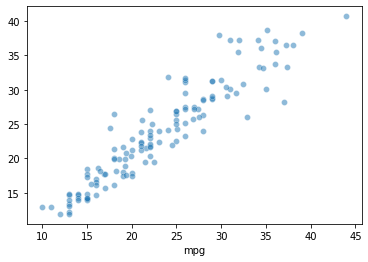

In [191]:
sns.scatterplot(x = y_test, y = gbes_preds, alpha = 0.5)

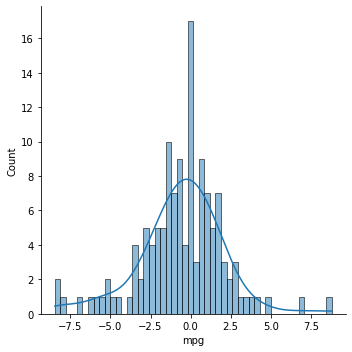

In [333]:
sns.displot((y_test - gbes_preds), bins=50, kde = True, alpha = 0.5)

### XGBoost Regressor

El XGBoost es otro tipo de Gradient Boosting.

In [194]:
import xgboost

xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

[22:57:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8523838373173112

El modelo por lo pronto nos da un $R^{2}$ de 0.852, esto no mejora el resultado anterior, vamos a intentar optimizar los parametros. 

#### Optimizacion de Parametros del Modelo XGBoost Regressor

In [335]:
XGBparam_grid = {'n_estimators' : [50, 100, 200, 300, 400, 500], 
              'learning_rate' : [0.001, 0.003, 0.01, 0.03, 0.1], 
              'subsample': [0.10, 0.25, 0.50, 0.75],
              'max_depth': [ 5, 7, 10, 13, 15, 20]}


XGBRS = RandomizedSearchCV(estimator = xgb, 
                        param_distributions = XGBparam_grid, 
                        n_iter = 100, verbose = 2, 
                        random_state = 42, n_jobs = -1)
XGBRS.fit(X_train, y_train) 
XGBRS.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    5.9s


[18:18:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    9.6s finished


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.25, verbosity=1)

In [337]:
xgb = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.25, verbosity=1)
xgb.fit(X_train, y_train)

[18:20:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.25, verbosity=1)

In [338]:
xgb_preds = xgb.predict(X_test)
print('Score:', xgb.score(X_test,y_test))
print('Error cuadratico medio: ', np.round(mean_squared_error(y_test, xgb_preds), 3))

Score: 0.8576383639280519
Error cuadratico medio:  7.518


El modelo no mejora la marca anterior, ni en el $R^{2}$ ni el error cuadratico medio.

### LightGBM Regressor

El LightGBM es otro algoritmo basado en el Gradient Boosting que suele funcionar muy bien en problemas de regresion.

In [343]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train, y_train)  
lgb_model.score(X_test, y_test)  

0.8409088223145101

La puntuacion del modelo no bate a la del anterior (XGBoost) antes de la optimizacion asi que no intentaremos mejorarlo.

### Modelo Conexionista

Los modelos conexionistas trabajan mejor con datos no estructurados y cuando estos son muy numerosos, nuestro dataset inicial no cumple ninguno de estos requisitios, no obstante, seria interesante mostrar como funcionaria con este problema de regresion.

Para ellos se usara la libreria *TensorFlow* y la API *Keras*

In [196]:
import tensorflow as tf
from tensorflow import keras

Para el modelo conexionista usaremos la matriz $X$ y el vector $y$ que contenian todas las variables y cuyos valores se guardaron con anterioridad para este proposito bajo el nombre *X_ann* y *y_ann*

In [197]:
from sklearn.model_selection import train_test_split

Xann_train, Xann_test, yann_train, yann_test = train_test_split(X_ann, y_ann, test_size=0.33, random_state=42)

Para la creacion del modelo conexionista se utilizaron regularizadores *l2* para disminuir los pesos resultantes tras cada propagacion hacia atras y asi prevenir un mayor sobreajuste, ademas de utilizar el dropout para apagar el 20% de las neuronas y asi prevenir la sobre-especializacion de las neuronas previniendo asi, finalmente, un mayor sobreajuste tambien.

La arquitectura neuronal que he usado ha sido Xx128x128x1, las dos primeras capas son neuronas cuya funcion de activacion son *RelU*, la neurona de salida es una funcion lineal sin funcion de activacion pues se trata de un problema de regresion lineal.

El optimizador usado es el *RMSprop* y utiliza un ratio de aprendizaje del 0.001 por ciento, las neuronas seran entrenadas a traves de 1000 iteraciones.

In [17]:
reglmodel = keras.Sequential([
    keras.layers.Dense(128, activation = tf.nn.relu, input_shape = [len(Xann_train.keys())], 
                       kernel_regularizer='l2'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation = tf.nn.relu, kernel_regularizer='l2'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
    ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

reglmodel.compile(loss = 'mse', optimizer = optimizer, metrics = 'mse')

reglmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1536      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 18,177
Trainable params: 18,177
Non-trainable params: 0
_________________________________________________________________


In [18]:
reglmodel.fit(Xann_train, yann_train, validation_split = 0.2, epochs = 1000)

Epoch 1/1000
7/7 [==============================] - 1s 36ms/step - loss: 555.2444 - mse: 553.7634 - val_loss: 599.7491 - val_mse: 598.2597
Epoch 2/1000
7/7 [==============================] - 0s 9ms/step - loss: 457.2502 - mse: 455.7537 - val_loss: 486.4437 - val_mse: 484.9202
Epoch 3/1000
7/7 [==============================] - 0s 10ms/step - loss: 369.0809 - mse: 367.5472 - val_loss: 367.4277 - val_mse: 365.8600
Epoch 4/1000
7/7 [==============================] - 0s 10ms/step - loss: 271.3778 - mse: 269.7989 - val_loss: 252.3695 - val_mse: 250.7536
Epoch 5/1000
7/7 [==============================] - 0s 12ms/step - loss: 172.0987 - mse: 170.4723 - val_loss: 152.3401 - val_mse: 150.6776
Epoch 6/1000
7/7 [==============================] - 0s 10ms/step - loss: 98.2499 - mse: 96.5796 - val_loss: 85.4369 - val_mse: 83.7374
Epoch 7/1000
7/7 [==============================] - 0s 11ms/step - loss: 60.0003 - mse: 58.2955 - val_loss: 51.6626 - val_mse: 49.9407
Epoch 8/1000
7/7 [==================

7/7 [==============================] - 0s 9ms/step - loss: 14.4077 - mse: 13.1344 - val_loss: 11.3588 - val_mse: 10.0892
Epoch 62/1000
7/7 [==============================] - 0s 9ms/step - loss: 10.6002 - mse: 9.3325 - val_loss: 14.3801 - val_mse: 13.1251
Epoch 63/1000
7/7 [==============================] - 0s 9ms/step - loss: 14.8234 - mse: 13.5591 - val_loss: 12.4277 - val_mse: 11.1643
Epoch 64/1000
7/7 [==============================] - 0s 10ms/step - loss: 11.0621 - mse: 9.8004 - val_loss: 13.2392 - val_mse: 11.9607
Epoch 65/1000
7/7 [==============================] - 0s 9ms/step - loss: 12.8179 - mse: 11.5471 - val_loss: 11.0235 - val_mse: 9.7583
Epoch 66/1000
7/7 [==============================] - 0s 9ms/step - loss: 12.9984 - mse: 11.7353 - val_loss: 11.7504 - val_mse: 10.4976
Epoch 67/1000
7/7 [==============================] - 0s 9ms/step - loss: 12.1772 - mse: 10.9208 - val_loss: 11.2067 - val_mse: 9.9458
Epoch 68/1000
7/7 [==============================] - 0s 9ms/step - loss:

7/7 [==============================] - 0s 9ms/step - loss: 9.4691 - mse: 8.3038 - val_loss: 10.9019 - val_mse: 9.7465
Epoch 123/1000
7/7 [==============================] - 0s 25ms/step - loss: 10.1377 - mse: 8.9799 - val_loss: 10.6690 - val_mse: 9.4980
Epoch 124/1000
7/7 [==============================] - 0s 9ms/step - loss: 11.8717 - mse: 10.7065 - val_loss: 9.5556 - val_mse: 8.3959
Epoch 125/1000
7/7 [==============================] - 0s 9ms/step - loss: 8.9599 - mse: 7.8045 - val_loss: 10.5357 - val_mse: 9.3800
Epoch 126/1000
7/7 [==============================] - 0s 10ms/step - loss: 11.8881 - mse: 10.7306 - val_loss: 10.2834 - val_mse: 9.1351
Epoch 127/1000
7/7 [==============================] - 0s 9ms/step - loss: 9.3788 - mse: 8.2286 - val_loss: 10.4007 - val_mse: 9.2426
Epoch 128/1000
7/7 [==============================] - 0s 10ms/step - loss: 7.2298 - mse: 6.0734 - val_loss: 10.3258 - val_mse: 9.1671
Epoch 129/1000
7/7 [==============================] - 0s 9ms/step - loss: 10.

7/7 [==============================] - 0s 9ms/step - loss: 11.0401 - mse: 9.9553 - val_loss: 10.0731 - val_mse: 8.9924
Epoch 184/1000
7/7 [==============================] - 0s 9ms/step - loss: 10.6281 - mse: 9.5435 - val_loss: 9.8165 - val_mse: 8.7311
Epoch 185/1000
7/7 [==============================] - 0s 10ms/step - loss: 10.1881 - mse: 9.1018 - val_loss: 9.9721 - val_mse: 8.8840
Epoch 186/1000
7/7 [==============================] - 0s 8ms/step - loss: 9.7863 - mse: 8.7020 - val_loss: 11.6807 - val_mse: 10.5824
Epoch 187/1000
7/7 [==============================] - 0s 9ms/step - loss: 12.8411 - mse: 11.7522 - val_loss: 10.2746 - val_mse: 9.1899
Epoch 188/1000
7/7 [==============================] - 0s 9ms/step - loss: 9.5957 - mse: 8.5122 - val_loss: 10.3393 - val_mse: 9.2598
Epoch 189/1000
7/7 [==============================] - 0s 9ms/step - loss: 9.4576 - mse: 8.3778 - val_loss: 9.5019 - val_mse: 8.4143
Epoch 190/1000
7/7 [==============================] - 0s 9ms/step - loss: 9.9982

7/7 [==============================] - 0s 9ms/step - loss: 10.6807 - mse: 9.6570 - val_loss: 8.0285 - val_mse: 7.0042
Epoch 245/1000
7/7 [==============================] - 0s 9ms/step - loss: 9.0913 - mse: 8.0693 - val_loss: 8.6703 - val_mse: 7.6432
Epoch 246/1000
7/7 [==============================] - 0s 9ms/step - loss: 9.9294 - mse: 8.9043 - val_loss: 8.9002 - val_mse: 7.8654
Epoch 247/1000
7/7 [==============================] - 0s 9ms/step - loss: 8.7840 - mse: 7.7548 - val_loss: 8.2610 - val_mse: 7.2331
Epoch 248/1000
7/7 [==============================] - 0s 9ms/step - loss: 10.5863 - mse: 9.5596 - val_loss: 9.1491 - val_mse: 8.1311
Epoch 249/1000
7/7 [==============================] - 0s 9ms/step - loss: 9.0660 - mse: 8.0449 - val_loss: 9.5628 - val_mse: 8.5320
Epoch 250/1000
7/7 [==============================] - 0s 10ms/step - loss: 9.1803 - mse: 8.1566 - val_loss: 9.6205 - val_mse: 8.5916
Epoch 251/1000
7/7 [==============================] - 0s 9ms/step - loss: 8.5679 - mse: 

Epoch 306/1000
7/7 [==============================] - 0s 9ms/step - loss: 7.4685 - mse: 6.5030 - val_loss: 8.5401 - val_mse: 7.5740
Epoch 307/1000
7/7 [==============================] - 0s 9ms/step - loss: 8.2167 - mse: 7.2508 - val_loss: 8.3375 - val_mse: 7.3679
Epoch 308/1000
7/7 [==============================] - 0s 9ms/step - loss: 10.6055 - mse: 9.6393 - val_loss: 10.8898 - val_mse: 9.9365
Epoch 309/1000
7/7 [==============================] - 0s 9ms/step - loss: 7.4244 - mse: 6.4662 - val_loss: 9.0179 - val_mse: 8.0548
Epoch 310/1000
7/7 [==============================] - 0s 9ms/step - loss: 7.3841 - mse: 6.4244 - val_loss: 8.8404 - val_mse: 7.8776
Epoch 311/1000
7/7 [==============================] - 0s 9ms/step - loss: 6.8272 - mse: 5.8641 - val_loss: 9.2614 - val_mse: 8.2986
Epoch 312/1000
7/7 [==============================] - 0s 9ms/step - loss: 10.7248 - mse: 9.7635 - val_loss: 9.6549 - val_mse: 8.6873
Epoch 313/1000
7/7 [==============================] - 0s 9ms/step - loss:

Epoch 368/1000
7/7 [==============================] - 0s 15ms/step - loss: 7.7792 - mse: 6.8621 - val_loss: 7.8555 - val_mse: 6.9361
Epoch 369/1000
7/7 [==============================] - 0s 44ms/step - loss: 7.2699 - mse: 6.3555 - val_loss: 7.9719 - val_mse: 7.0531
Epoch 370/1000
7/7 [==============================] - 0s 17ms/step - loss: 9.5352 - mse: 8.6206 - val_loss: 8.0042 - val_mse: 7.0844
Epoch 371/1000
7/7 [==============================] - 0s 17ms/step - loss: 8.7708 - mse: 7.8569 - val_loss: 7.9754 - val_mse: 7.0595
Epoch 372/1000
7/7 [==============================] - 0s 21ms/step - loss: 9.0360 - mse: 8.1216 - val_loss: 9.9252 - val_mse: 9.0189
Epoch 373/1000
7/7 [==============================] - 0s 18ms/step - loss: 8.9692 - mse: 8.0578 - val_loss: 10.3107 - val_mse: 9.4084
Epoch 374/1000
7/7 [==============================] - 0s 16ms/step - loss: 9.7626 - mse: 8.8559 - val_loss: 8.0090 - val_mse: 7.0903
Epoch 375/1000
7/7 [==============================] - 0s 14ms/step -

7/7 [==============================] - 0s 19ms/step - loss: 10.2254 - mse: 9.3465 - val_loss: 7.0957 - val_mse: 6.2126
Epoch 430/1000
7/7 [==============================] - 0s 11ms/step - loss: 9.7914 - mse: 8.9122 - val_loss: 7.5138 - val_mse: 6.6296
Epoch 431/1000
7/7 [==============================] - 0s 20ms/step - loss: 11.2851 - mse: 10.4059 - val_loss: 7.2144 - val_mse: 6.3345
Epoch 432/1000
7/7 [==============================] - 0s 20ms/step - loss: 8.4030 - mse: 7.5266 - val_loss: 8.3845 - val_mse: 7.5159
Epoch 433/1000
7/7 [==============================] - 0s 19ms/step - loss: 7.1811 - mse: 6.3116 - val_loss: 7.9536 - val_mse: 7.0820
Epoch 434/1000
7/7 [==============================] - 0s 21ms/step - loss: 7.5828 - mse: 6.7106 - val_loss: 7.9615 - val_mse: 7.0909
Epoch 435/1000
7/7 [==============================] - 0s 22ms/step - loss: 7.6144 - mse: 6.7459 - val_loss: 7.9565 - val_mse: 7.0803
Epoch 436/1000
7/7 [==============================] - 0s 12ms/step - loss: 7.2804

7/7 [==============================] - 0s 10ms/step - loss: 7.6547 - mse: 6.8157 - val_loss: 8.0702 - val_mse: 7.2351
Epoch 491/1000
7/7 [==============================] - 0s 10ms/step - loss: 11.9367 - mse: 11.0971 - val_loss: 8.2444 - val_mse: 7.4006
Epoch 492/1000
7/7 [==============================] - 0s 10ms/step - loss: 7.6835 - mse: 6.8396 - val_loss: 8.8346 - val_mse: 7.9807
Epoch 493/1000
7/7 [==============================] - 0s 9ms/step - loss: 7.8397 - mse: 6.9927 - val_loss: 9.9169 - val_mse: 9.0849
Epoch 494/1000
7/7 [==============================] - 0s 9ms/step - loss: 8.3863 - mse: 7.5505 - val_loss: 7.5101 - val_mse: 6.6683
Epoch 495/1000
7/7 [==============================] - 0s 9ms/step - loss: 8.4991 - mse: 7.6582 - val_loss: 8.7747 - val_mse: 7.9474
Epoch 496/1000
7/7 [==============================] - 0s 10ms/step - loss: 8.6083 - mse: 7.7741 - val_loss: 8.4422 - val_mse: 7.6153
Epoch 497/1000
7/7 [==============================] - 0s 10ms/step - loss: 7.9068 - m

Epoch 552/1000
7/7 [==============================] - 0s 26ms/step - loss: 7.6770 - mse: 6.8701 - val_loss: 7.4457 - val_mse: 6.6309
Epoch 553/1000
7/7 [==============================] - 0s 9ms/step - loss: 8.1348 - mse: 7.3229 - val_loss: 7.3376 - val_mse: 6.5255
Epoch 554/1000
7/7 [==============================] - 0s 10ms/step - loss: 7.4215 - mse: 6.6137 - val_loss: 7.4744 - val_mse: 6.6593
Epoch 555/1000
7/7 [==============================] - 0s 10ms/step - loss: 8.5721 - mse: 7.7627 - val_loss: 7.5750 - val_mse: 6.7631
Epoch 556/1000
7/7 [==============================] - 0s 11ms/step - loss: 7.5569 - mse: 6.7466 - val_loss: 8.8482 - val_mse: 8.0455
Epoch 557/1000
7/7 [==============================] - 0s 9ms/step - loss: 7.4805 - mse: 6.6767 - val_loss: 8.2827 - val_mse: 7.4776
Epoch 558/1000
7/7 [==============================] - 0s 9ms/step - loss: 6.5924 - mse: 5.7854 - val_loss: 7.3406 - val_mse: 6.5326
Epoch 559/1000
7/7 [==============================] - 0s 9ms/step - loss

Epoch 614/1000
7/7 [==============================] - 0s 10ms/step - loss: 7.2245 - mse: 6.4375 - val_loss: 8.5477 - val_mse: 7.7636
Epoch 615/1000
7/7 [==============================] - 0s 11ms/step - loss: 8.2440 - mse: 7.4565 - val_loss: 8.0852 - val_mse: 7.2958
Epoch 616/1000
7/7 [==============================] - 0s 9ms/step - loss: 7.3063 - mse: 6.5178 - val_loss: 8.1112 - val_mse: 7.3166
Epoch 617/1000
7/7 [==============================] - 0s 10ms/step - loss: 8.1098 - mse: 7.3215 - val_loss: 7.3910 - val_mse: 6.5989
Epoch 618/1000
7/7 [==============================] - 0s 9ms/step - loss: 8.6594 - mse: 7.8698 - val_loss: 8.9208 - val_mse: 8.1345
Epoch 619/1000
7/7 [==============================] - 0s 9ms/step - loss: 6.8022 - mse: 6.0165 - val_loss: 7.9671 - val_mse: 7.1813
Epoch 620/1000
7/7 [==============================] - 0s 10ms/step - loss: 7.0379 - mse: 6.2544 - val_loss: 8.3508 - val_mse: 7.5573
Epoch 621/1000
7/7 [==============================] - 0s 10ms/step - los

Epoch 676/1000
7/7 [==============================] - 0s 10ms/step - loss: 6.9938 - mse: 6.2239 - val_loss: 8.9118 - val_mse: 8.1344
Epoch 677/1000
7/7 [==============================] - 0s 10ms/step - loss: 8.6657 - mse: 7.8933 - val_loss: 8.9545 - val_mse: 8.1902
Epoch 678/1000
7/7 [==============================] - 0s 10ms/step - loss: 6.1162 - mse: 5.3516 - val_loss: 7.5452 - val_mse: 6.7743
Epoch 679/1000
7/7 [==============================] - 0s 11ms/step - loss: 8.5990 - mse: 7.8297 - val_loss: 9.4216 - val_mse: 8.6626
Epoch 680/1000
7/7 [==============================] - 0s 10ms/step - loss: 7.9486 - mse: 7.1846 - val_loss: 7.3014 - val_mse: 6.5348
Epoch 681/1000
7/7 [==============================] - 0s 11ms/step - loss: 6.4130 - mse: 5.6481 - val_loss: 7.3926 - val_mse: 6.6269
Epoch 682/1000
7/7 [==============================] - 0s 10ms/step - loss: 6.4979 - mse: 5.7342 - val_loss: 7.7197 - val_mse: 6.9569
Epoch 683/1000
7/7 [==============================] - 0s 10ms/step - 

Epoch 738/1000
7/7 [==============================] - 0s 10ms/step - loss: 6.8790 - mse: 6.1212 - val_loss: 7.7803 - val_mse: 7.0170
Epoch 739/1000
7/7 [==============================] - 0s 10ms/step - loss: 8.8725 - mse: 8.1143 - val_loss: 8.5949 - val_mse: 7.8425
Epoch 740/1000
7/7 [==============================] - 0s 10ms/step - loss: 6.3985 - mse: 5.6435 - val_loss: 7.3352 - val_mse: 6.5768
Epoch 741/1000
7/7 [==============================] - 0s 9ms/step - loss: 7.6949 - mse: 6.9388 - val_loss: 7.4738 - val_mse: 6.7163
Epoch 742/1000
7/7 [==============================] - 0s 9ms/step - loss: 8.2347 - mse: 7.4768 - val_loss: 8.7280 - val_mse: 7.9759
Epoch 743/1000
7/7 [==============================] - 0s 9ms/step - loss: 6.6663 - mse: 5.9120 - val_loss: 7.3675 - val_mse: 6.6106
Epoch 744/1000
7/7 [==============================] - 0s 9ms/step - loss: 7.2166 - mse: 6.4609 - val_loss: 9.0684 - val_mse: 8.3230
Epoch 745/1000
7/7 [==============================] - 0s 9ms/step - loss:

Epoch 800/1000
7/7 [==============================] - 0s 9ms/step - loss: 6.8160 - mse: 6.0793 - val_loss: 8.3610 - val_mse: 7.6260
Epoch 801/1000
7/7 [==============================] - 0s 10ms/step - loss: 7.6581 - mse: 6.9181 - val_loss: 7.1133 - val_mse: 6.3701
Epoch 802/1000
7/7 [==============================] - 0s 9ms/step - loss: 6.1401 - mse: 5.3978 - val_loss: 8.2727 - val_mse: 7.5379
Epoch 803/1000
7/7 [==============================] - 0s 10ms/step - loss: 7.7482 - mse: 7.0072 - val_loss: 7.5512 - val_mse: 6.8123
Epoch 804/1000
7/7 [==============================] - 0s 9ms/step - loss: 7.9707 - mse: 7.2322 - val_loss: 7.7515 - val_mse: 7.0145
Epoch 805/1000
7/7 [==============================] - 0s 9ms/step - loss: 7.4600 - mse: 6.7224 - val_loss: 7.7125 - val_mse: 6.9724
Epoch 806/1000
7/7 [==============================] - 0s 9ms/step - loss: 6.8598 - mse: 6.1183 - val_loss: 8.4233 - val_mse: 7.6832
Epoch 807/1000
7/7 [==============================] - 0s 9ms/step - loss: 

Epoch 862/1000
7/7 [==============================] - 0s 10ms/step - loss: 5.8437 - mse: 5.1125 - val_loss: 8.8275 - val_mse: 8.1024
Epoch 863/1000
7/7 [==============================] - 0s 10ms/step - loss: 5.6660 - mse: 4.9371 - val_loss: 9.5805 - val_mse: 8.8556
Epoch 864/1000
7/7 [==============================] - 0s 14ms/step - loss: 10.4647 - mse: 9.7333 - val_loss: 8.0801 - val_mse: 7.3491
Epoch 865/1000
7/7 [==============================] - 0s 15ms/step - loss: 6.3110 - mse: 5.5789 - val_loss: 7.4936 - val_mse: 6.7565
Epoch 866/1000
7/7 [==============================] - 0s 18ms/step - loss: 6.9240 - mse: 6.1885 - val_loss: 9.1298 - val_mse: 8.4047
Epoch 867/1000
7/7 [==============================] - 0s 17ms/step - loss: 7.2221 - mse: 6.4928 - val_loss: 7.8999 - val_mse: 7.1641
Epoch 868/1000
7/7 [==============================] - 0s 18ms/step - loss: 6.0717 - mse: 5.3380 - val_loss: 7.5608 - val_mse: 6.8237
Epoch 869/1000
7/7 [==============================] - 0s 15ms/step -

7/7 [==============================] - 0s 16ms/step - loss: 6.3905 - mse: 5.6640 - val_loss: 8.4228 - val_mse: 7.6971
Epoch 924/1000
7/7 [==============================] - 0s 13ms/step - loss: 5.8776 - mse: 5.1507 - val_loss: 8.6324 - val_mse: 7.9070
Epoch 925/1000
7/7 [==============================] - 0s 11ms/step - loss: 5.7634 - mse: 5.0376 - val_loss: 8.1122 - val_mse: 7.3805
Epoch 926/1000
7/7 [==============================] - 0s 19ms/step - loss: 7.8582 - mse: 7.1316 - val_loss: 8.0273 - val_mse: 7.3068
Epoch 927/1000
7/7 [==============================] - 0s 20ms/step - loss: 7.1275 - mse: 6.4048 - val_loss: 8.0249 - val_mse: 7.3038
Epoch 928/1000
7/7 [==============================] - 0s 19ms/step - loss: 7.1423 - mse: 6.4198 - val_loss: 7.7904 - val_mse: 7.0671
Epoch 929/1000
7/7 [==============================] - 0s 15ms/step - loss: 7.3116 - mse: 6.5884 - val_loss: 8.7764 - val_mse: 8.0569
Epoch 930/1000
7/7 [==============================] - 0s 15ms/step - loss: 5.4926 - 

Epoch 985/1000
7/7 [==============================] - 0s 16ms/step - loss: 5.9744 - mse: 5.2502 - val_loss: 8.2327 - val_mse: 7.5096
Epoch 986/1000
7/7 [==============================] - 0s 15ms/step - loss: 6.2571 - mse: 5.5319 - val_loss: 8.3425 - val_mse: 7.6141
Epoch 987/1000
7/7 [==============================] - 0s 17ms/step - loss: 6.2430 - mse: 5.5157 - val_loss: 9.3664 - val_mse: 8.6452
Epoch 988/1000
7/7 [==============================] - 0s 13ms/step - loss: 6.5841 - mse: 5.8597 - val_loss: 8.2832 - val_mse: 7.5519
Epoch 989/1000
7/7 [==============================] - 0s 18ms/step - loss: 5.8598 - mse: 5.1330 - val_loss: 7.6044 - val_mse: 6.8766
Epoch 990/1000
7/7 [==============================] - 0s 14ms/step - loss: 5.4855 - mse: 4.7601 - val_loss: 7.9450 - val_mse: 7.2194
Epoch 991/1000
7/7 [==============================] - 0s 15ms/step - loss: 7.4098 - mse: 6.6835 - val_loss: 7.5780 - val_mse: 6.8495
Epoch 992/1000
7/7 [==============================] - 0s 14ms/step - 

#### Resultado

In [21]:
print(reglmodel.evaluate(Xann_test, yann_test))

5/5 [==============================] - 0s 1ms/step - loss: 7.7157 - mse: 6.9878
[7.715671062469482, 6.987757205963135]


Hemos podido usar reducir el **error cuadratico medio** a un 6.98, por lo que este es el modelo que mejor predice cuanto va a consumir un coche dado.

In [42]:
predictions_ann = reglmodel.predict(Xann_test).reshape(130,)

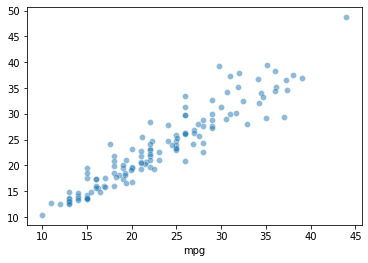

In [43]:
sns.scatterplot(x = y_test, y = predictions_ann, alpha = 0.5)

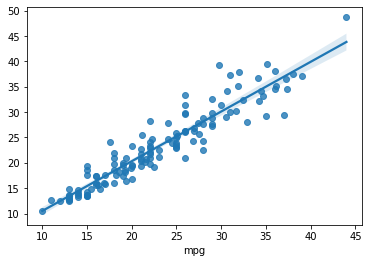

In [198]:
sns.regplot(x = y_test, y = predictions_ann)

In [153]:
np.round(r2_score(y_test, predictions_ann),2)

0.87

Nuestro modelo conexionista explica tambien un 87% de la varianza del modelo, resultado superior al resto de modelos empleados.